In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df_1 = pd.read_csv('/content/Groceries_dataset.csv')
df_2 = pd.read_csv('/content/GroceryDataset.csv')
df_3 = pd.read_csv('/content/WMT_Grocery_202209.csv')
df_4 = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')
df_5 = pd.read_csv('/content/groceries - groceries.csv')
df_6 = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df_7 = pd.read_csv('/content/supermarket_sales.csv')
df_8 = pd.read_csv('/content/grocery_data_feb_2025.csv')

<ipython-input-13-27c0615256f9>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv('/content/WMT_Grocery_202209.csv')


<ipython-input-14-cbdf9f6253ef>:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv('/content/WMT_Grocery_202209.csv')


🧾 Columns:
 Index(['member_number', 'date', 'itemdescription', 'source', 'sub_category',
       'price', 'discount', 'rating', 'title', 'currency',
       ...
       'inventoryindicator.indicatorid', 'inventoryindicator.text', 'deal',
       'pricing.environmentalhandlingfee.carbonfee',
       'pricing.environmentalhandlingfee.ecologyfee',
       'pricing.environmentalhandlingfee.electronicfee',
       'pricing.environmentalhandlingfee.hazardousfee', 'productbadge.badgeid',
       'productbadge.badgeclass', 'productbadge.text'],
      dtype='object', length=137)

🔍 Data Types:
 member_number                                     float64
date                                               object
itemdescription                                    object
source                                             object
sub_category                                       object
                                                   ...   
pricing.environmentalhandlingfee.electronicfee    float64
pricing.e

<ipython-input-14-cbdf9f6253ef>:79: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


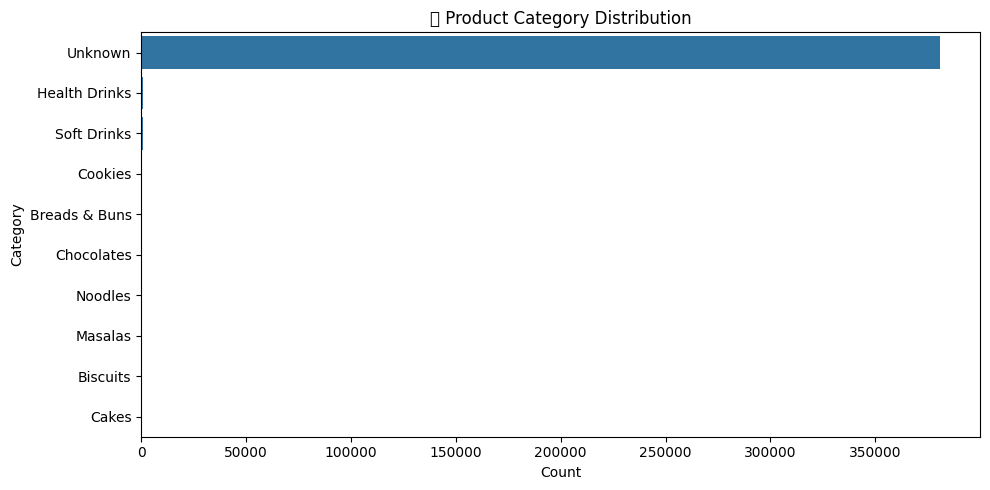

<ipython-input-14-cbdf9f6253ef>:88: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


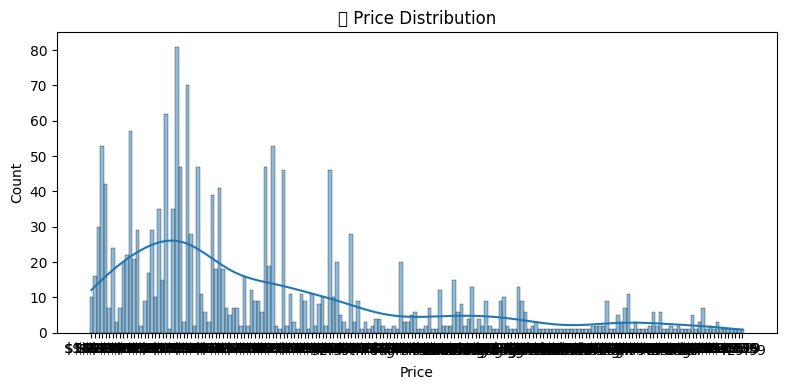

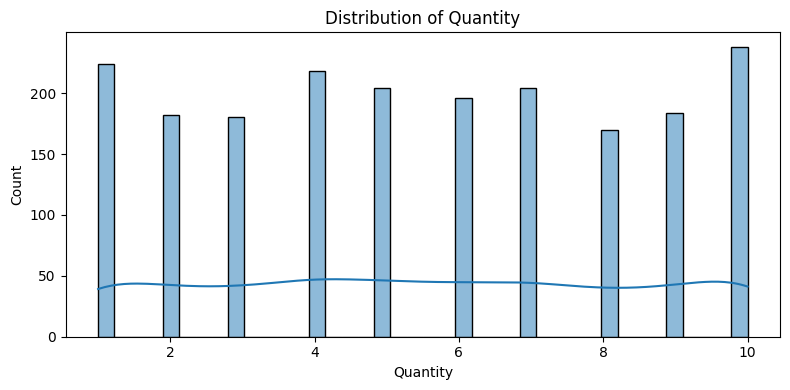

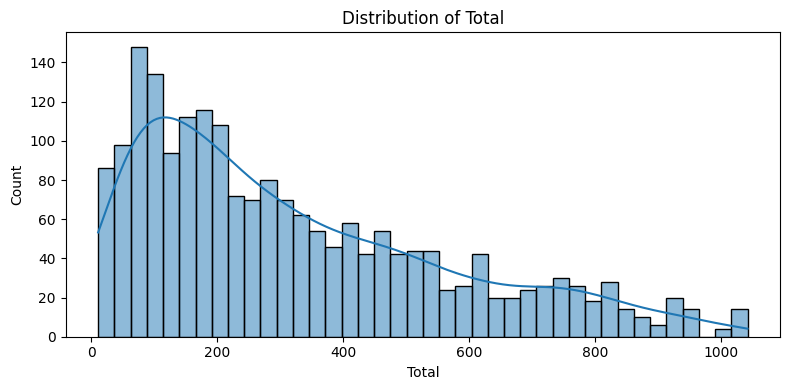

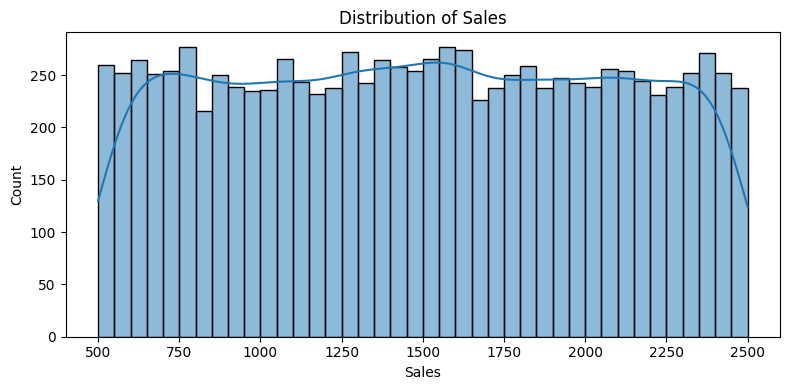

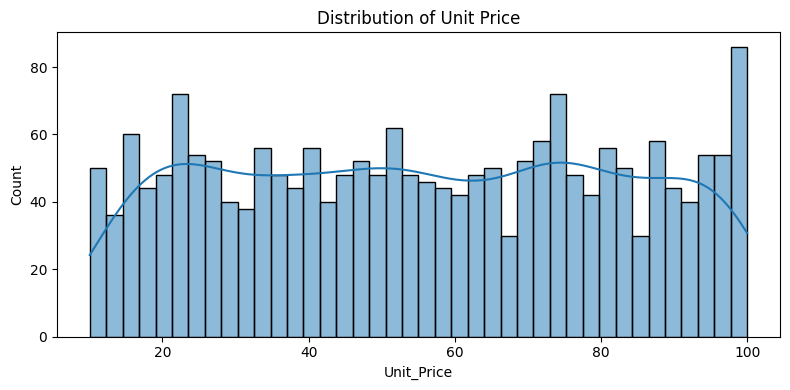

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

# Load all datasets
df_1 = pd.read_csv('/content/Groceries_dataset.csv')
df_2 = pd.read_csv('/content/GroceryDataset.csv')
df_3 = pd.read_csv('/content/WMT_Grocery_202209.csv')
df_4 = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')
df_5 = pd.read_csv('/content/groceries - groceries.csv')
df_6 = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df_7 = pd.read_csv('/content/supermarket_sales.csv')
df_8 = pd.read_csv('/content/grocery_data_feb_2025.csv')

# Combine all into one DataFrame
dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]
for i, df in enumerate(dfs, 1):
    df['source'] = f'df_{i}'
data = pd.concat(dfs, ignore_index=True)

# Fix duplicate column names
def make_unique_columns(cols):
    seen = {}
    new_cols = []
    for col in cols:
        col_clean = col.strip().lower().replace(' ', '_')
        if col_clean in seen:
            seen[col_clean] += 1
            col_clean = f"{col_clean}_{seen[col_clean]}"
        else:
            seen[col_clean] = 0
        new_cols.append(col_clean)
    return new_cols

data.columns = make_unique_columns(data.columns)

# Preview
print("🧾 Columns:\n", data.columns)
print("\n🔍 Data Types:\n", data.dtypes)
print("\n🧼 Null Values:\n", data.isnull().sum())
print("\n📊 Sample Data:\n", data.head())
print("\n📈 Summary Stats (numeric columns):\n", data.describe())

# Most Frequent Products
product_col = next((col for col in data.columns if 'product' in col), None)
if product_col:
    print(f"\n📌 Top 10 Most Frequent {product_col.title()}s:")
    print(data[product_col].value_counts().head(10))

# Category Analysis
category_col = next((col for col in data.columns if 'category' in col), None)
if category_col:
    def extract_category(cat):
        try:
            if isinstance(cat, str):
                parsed = ast.literal_eval(cat)
            else:
                parsed = cat
            if isinstance(parsed, list) and parsed:
                return str(parsed[0])
            elif isinstance(parsed, dict) and parsed:
                return str(next(iter(parsed.values())))
            elif pd.isnull(parsed):
                return "Unknown"
            else:
                return str(parsed)
        except Exception:
            return str(cat)

    data['category_clean'] = data[category_col].apply(extract_category)

    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, y='category_clean', order=data['category_clean'].value_counts().head(10).index)
    plt.title('🛒 Product Category Distribution')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()

# Price Distribution
if 'price' in data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data['price'].dropna(), bins=50, kde=True)
    plt.title('💰 Price Distribution')
    plt.xlabel('Price')
    plt.tight_layout()
    plt.show()

# Sales Insights
for col in ['quantity', 'total', 'sales', 'unit_price']:
    if col in data.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col].dropna(), bins=40, kde=True)
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col.title())
        plt.tight_layout()
        plt.show()


In [ ]:
# Identify product and category columns from the merged dataset
product_col = next((col for col in data.columns if 'product' in col.lower()), None)
category_col = next((col for col in data.columns if 'category' in col.lower()), None)

# Extract relevant columns (raw, unprocessed)
raw_product_category_df = data[[product_col, category_col, 'source']].copy()

# Show basic info
print(raw_product_category_df.head(10))


  product_description sub_category source
0                 NaN          NaN   df_1
1                 NaN          NaN   df_1
2                 NaN          NaN   df_1
3                 NaN          NaN   df_1
4                 NaN          NaN   df_1
5                 NaN          NaN   df_1
6                 NaN          NaN   df_1
7                 NaN          NaN   df_1
8                 NaN          NaN   df_1
9                 NaN          NaN   df_1


In [ ]:
import pandas as pd

# File paths
file_paths = {
    'df_1': '/content/Groceries_dataset.csv',
    'df_2': '/content/GroceryDataset.csv',
    'df_3': '/content/WMT_Grocery_202209.csv',
    'df_4': '/content/Supermart Grocery Sales - Retail Analytics Dataset.csv',
    'df_5': '/content/groceries - groceries.csv',
    'df_6': '/content/supermarket_sales - Sheet1.csv',
    'df_7': '/content/supermarket_sales.csv',
    'df_8': '/content/grocery_data_feb_2025.csv'
}

# Load and show heads
for name, path in file_paths.items():
    df = pd.read_csv(path)
    print(f"\n📁 {name} - {path}")
    print(df.head(), "\n")



📁 df_1 - /content/Groceries_dataset.csv
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk 


📁 df_2 - /content/GroceryDataset.csv
        Sub Category     Price     Discount  \
0  Bakery & Desserts   $56.99   No Discount   
1  Bakery & Desserts  $159.99   No Discount   
2  Bakery & Desserts   $44.99   No Discount   
3  Bakery & Desserts   $39.99   No Discount   
4  Bakery & Desserts   $59.99   No Discount   

                                            Rating  \
0   Rated 4.3 out of 5 stars based on 265 reviews.   
1       Rated 5 out of 5 stars based on 1 reviews.   
2   Rated 4.1 out of 5 stars based on 441 reviews.   
3  Rated 4.7 out of 5 stars based on 9459 reviews.   
4   Rated 4.5 out of 5 stars based on 758 reviews.   

                             

<ipython-input-16-ee5d3eaf3803>:17: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)



📁 df_3 - /content/WMT_Grocery_202209.csv
   SHIPPING_LOCATION DEPARTMENT               CATEGORY SUBCATEGORY  \
0              79936       Deli  Hummus, Dips, & Salsa         NaN   
1              79936       Deli  Hummus, Dips, & Salsa         NaN   
2              79936       Deli  Hummus, Dips, & Salsa         NaN   
3              79936       Deli  Hummus, Dips, & Salsa         NaN   
4              79936       Deli  Hummus, Dips, & Salsa         NaN   

                  BREADCRUMBS          SKU  \
0  Deli/Hummus, Dips, & Salsa  110895339.0   
1  Deli/Hummus, Dips, & Salsa  105455228.0   
2  Deli/Hummus, Dips, & Salsa  128642379.0   
3  Deli/Hummus, Dips, & Salsa  366126367.0   
4  Deli/Hummus, Dips, & Salsa  160090316.0   

                                         PRODUCT_URL  \
0  https://www.walmart.com/ip/Marketside-Roasted-...   
1  https://www.walmart.com/ip/Marketside-Roasted-...   
2  https://www.walmart.com/ip/Marketside-Classic-...   
3  https://www.walmart.com/ip/Market

In [ ]:
dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7]
for i, df in enumerate(dfs, start=1):
    print(f"\nColumns in df_{i}:")
    print(df.columns.tolist())


Columns in df_1:
['Member_number', 'Date', 'itemDescription', 'source']

Columns in df_2:
['Sub Category', 'Price', 'Discount', 'Rating', 'Title', 'Currency', 'Feature', 'Product Description', 'source']

Columns in df_3:
['SHIPPING_LOCATION', 'DEPARTMENT', 'CATEGORY', 'SUBCATEGORY', 'BREADCRUMBS', 'SKU', 'PRODUCT_URL', 'PRODUCT_NAME', 'BRAND', 'PRICE_RETAIL', 'PRICE_CURRENT', 'PRODUCT_SIZE', 'PROMOTION', 'RunDate', 'tid', 'source']

Columns in df_4:
['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City', 'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State', 'source']

Columns in df_5:
['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12', 'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18', 'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24', 'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30', 'Item 31', 'Item 32', 'source']

Columns in df_6:
['In

```Recommendation System```


In [ ]:
# For recommendation, concatenate purchase records from df_1 and df_5
df_5_long = pd.melt(df_5, id_vars=['Item(s)'], value_name='itemDescription')
df_5_long = df_5_long.dropna(subset=['itemDescription'])

# Align column names with df_1
df_5_long.rename(columns={'Item(s)': 'Member_number'}, inplace=True)

# Combine both
df_recommendation = pd.concat([df_1[['Member_number', 'itemDescription']], df_5_long[['Member_number', 'itemDescription']]], ignore_index=True)


<ipython-input-18-56c668833d68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_long.rename(columns={'Item(s)': 'Member_number'}, inplace=True)


In [ ]:
# Drop nulls (if any)
df_recommendation.dropna(subset=['Member_number', 'itemDescription'], inplace=True)

# Strip whitespace & lowercase for consistency
df_recommendation['itemDescription'] = df_recommendation['itemDescription'].str.strip().str.lower()

# Check duplicates
df_recommendation.drop_duplicates(inplace=True)

# Final check
print(df_recommendation.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37940 entries, 0 to 90810
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    37940 non-null  int64 
 1   itemDescription  37940 non-null  object
dtypes: int64(1), object(1)
memory usage: 889.2+ KB
None


In [ ]:
df_recommendation.head()

,Member_number,itemDescription
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk


In [ ]:
df_recommendation.isnull().sum()

,0
Member_number,0
itemDescription,0


In [ ]:
# Check unique customers and items
print("Total unique customers:", df_recommendation['Member_number'].nunique())
print("Total unique items:", df_recommendation['itemDescription'].nunique())

# Most frequent items
top_items = df_recommendation['itemDescription'].value_counts().head(10)
print("Top 10 most purchased items:\n", top_items)

# Most active members
top_members = df_recommendation['Member_number'].value_counts().head(10)
print("Top 10 most active customers:\n", top_members)


Total unique customers: 3927
Total unique items: 171
Top 10 most purchased items:
 itemDescription
whole milk          1814
other vegetables    1495
rolls/buns          1390
soda                1246
yogurt              1131
tropical fruit       939
root vegetables      927
bottled water        858
sausage              831
citrus fruit         748
Name: count, dtype: int64
Top 10 most active customers:
 Member_number
9     161
5     157
6     156
4     156
3     154
2     153
8     152
11    152
7     151
10    149
Name: count, dtype: int64


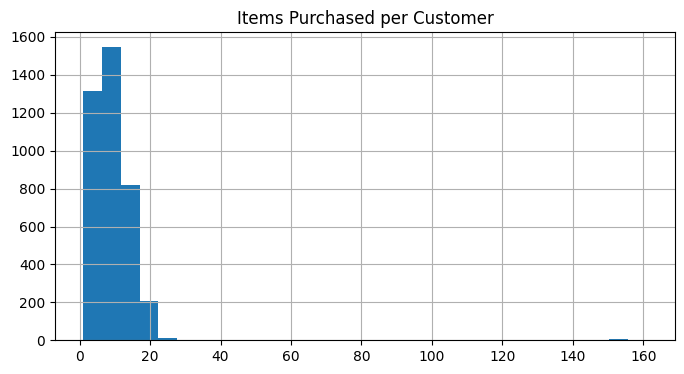

In [ ]:
# Items per member distribution
items_per_member = df_recommendation.groupby('Member_number')['itemDescription'].count()
items_per_member.hist(bins=30, figsize=(8,4))
plt.title('Items Purchased per Customer') # Set the title using plt.title()
plt.show() # Display the plot

In [ ]:
# Save the recommendation dataset
df_recommendation.to_csv('recommendation_dataset.csv', index=False)

print("✅ Dataset saved as 'recommendation_dataset.csv'")


✅ Dataset saved as 'recommendation_dataset.csv'


In [ ]:
from google.colab import files
files.download('recommendation_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

```Sales Prediction```

In [ ]:
import pandas as pd

# Step 1: Start with df_2 (product features)
df_sales_all = df_2.copy()

# Step 2: Merge with df_3 on "Sub Category" ↔ "SUBCATEGORY" (broad match)
df_sales_all = pd.merge(df_sales_all, df_3, left_on='Sub Category', right_on='SUBCATEGORY', how='left')

# Step 3: Merge with df_4 on "Sub Category" ↔ "Sub Category" (direct match)
df_sales_all = pd.merge(df_sales_all, df_4, on='Sub Category', how='left')

# Step 4: Merge with df_6 on "Product line" ↔ "Sub Category" (approx. match)
df_sales_all = pd.merge(df_sales_all, df_6, left_on='Sub Category', right_on='Product line', how='left', suffixes=('', '_df6'))

# Step 5: Merge with df_7 similarly (assumed similar structure to df_6)
df_sales_all = pd.merge(df_sales_all, df_7, left_on='Sub Category', right_on='Product line', how='left', suffixes=('', '_df7'))

# Step 6: View column names and head of the merged dataset
print("Final merged dataset shape:", df_sales_all.shape)
print("Merged dataset columns:\n", df_sales_all.columns.tolist())

# Step 7: View top rows
df_sales_all.head()

Final merged dataset shape: (1072958, 72)
Merged dataset columns:
 ['Sub Category', 'Price', 'Discount_x', 'Rating', 'Title', 'Currency', 'Feature', 'Product Description', 'source_x', 'SHIPPING_LOCATION', 'DEPARTMENT', 'CATEGORY', 'SUBCATEGORY', 'BREADCRUMBS', 'SKU', 'PRODUCT_URL', 'PRODUCT_NAME', 'BRAND', 'PRICE_RETAIL', 'PRICE_CURRENT', 'PRODUCT_SIZE', 'PROMOTION', 'RunDate', 'tid', 'source_y', 'Order ID', 'Customer Name', 'Category', 'City', 'Order Date', 'Region', 'Sales', 'Discount_y', 'Profit', 'State', 'source', 'Invoice ID', 'Branch', 'City_df6', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating_df6', 'source_df6', 'Invoice ID_df7', 'Branch_df7', 'City_df7', 'Customer type_df7', 'Gender_df7', 'Product line_df7', 'Unit price_df7', 'Quantity_df7', 'Tax 5%_df7', 'Total_df7', 'Date_df7', 'Time_df7', 'Payment_df7', 'cogs_df7', 'gross margin percentage_df7', 'gr

,Sub Category,Price,Discount_x,Rating,Title,Currency,Feature,Product Description,source_x,SHIPPING_LOCATION,...,Tax 5%_df7,Total_df7,Date_df7,Time_df7,Payment_df7,cogs_df7,gross margin percentage_df7,gross income_df7,Rating_df7,source_df7
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,df_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",df_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,df_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,df_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,df_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_to_keep = [
    'Sub Category',
    'Price',
    'Discount_x',
    'Rating',
    'Title',
    'Currency',
    'Feature',
    'Product Description'
]


In [ ]:
# Keep only the selected populated columns
df_clean = df_sales_all[columns_to_keep].copy()

# Strip $ from Price and convert to float
df_clean['Price'] = df_clean['Price'].str.replace('$', '', regex=False).str.replace(',', '')
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

# Convert Discount_x to float (extract number if it's in string like '10% Off')
df_clean['Discount'] = df_clean['Discount_x'].str.extract(r'(\d+\.?\d*)').astype(float)

# Extract numeric rating from text like "Rated 4.3 out of 5 stars based on 265 reviews."
df_clean['Rating_clean'] = df_clean['Rating'].str.extract(r'Rated (\d+\.?\d*)')

# Convert to float
df_clean['Rating_clean'] = pd.to_numeric(df_clean['Rating_clean'], errors='coerce')

# View result
df_clean.head()


,Sub Category,Price,Discount_x,Rating,Title,Currency,Feature,Product Description,Discount,Rating_clean
0,Bakery & Desserts,56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,NaN,4.3
1,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",NaN,5.0
2,Bakery & Desserts,44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,NaN,4.1
3,Bakery & Desserts,39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,NaN,4.7
4,Bakery & Desserts,59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,NaN,4.5


In [ ]:
# Price: remove $ and convert to float
# Check if the 'Price' column is of object type before applying str methods
if df_clean['Price'].dtype == object:
    df_clean['Price'] = df_clean['Price'].str.replace('$', '', regex=False).str.replace(',', '')

df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

# Discount: extract numeric value
df_clean['Discount'] = df_clean['Discount_x'].str.extract(r'(\d+\.?\d*)').astype(float)

# Rating: extract rating number from string
df_clean['Rating_clean'] = df_clean['Rating'].str.extract(r'Rated (\d+\.?\d*)')
df_clean['Rating_clean'] = pd.to_numeric(df_clean['Rating_clean'], errors='coerce')

In [ ]:
# Fill nulls
df_clean['Sub Category'].fillna(df_clean['Sub Category'].mode()[0], inplace=True)
df_clean['Currency'].fillna(df_clean['Currency'].mode()[0], inplace=True)

df_clean['Price'].fillna(df_clean['Price'].median(), inplace=True)
df_clean['Discount'].fillna(df_clean['Discount'].median(), inplace=True)
df_clean['Rating_clean'].fillna(df_clean['Rating_clean'].median(), inplace=True)

df_clean['Feature'].fillna('Unknown', inplace=True)
df_clean['Product Description'].fillna('Unknown', inplace=True)
df_clean['Title'].fillna('Unknown', inplace=True)

<ipython-input-25-cd2d258e618e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Sub Category'].fillna(df_clean['Sub Category'].mode()[0], inplace=True)
<ipython-input-25-cd2d258e618e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
df_clean.drop(['Discount_x', 'Rating'], axis=1, inplace=True)

In [ ]:
print("Nulls after cleaning:\n", df_clean.isnull().sum())
df_clean.head()

Nulls after cleaning:
 Sub Category           0
Price                  0
Title                  0
Currency               0
Feature                0
Product Description    0
Discount               0
Rating_clean           0
dtype: int64


,Sub Category,Price,Title,Currency,Feature,Product Description,Discount,Rating_clean
0,Bakery & Desserts,56.99,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,6.0,4.3
1,Bakery & Desserts,159.99,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",6.0,5.0
2,Bakery & Desserts,44.99,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,6.0,4.1
3,Bakery & Desserts,39.99,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,6.0,4.7
4,Bakery & Desserts,59.99,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,6.0,4.5


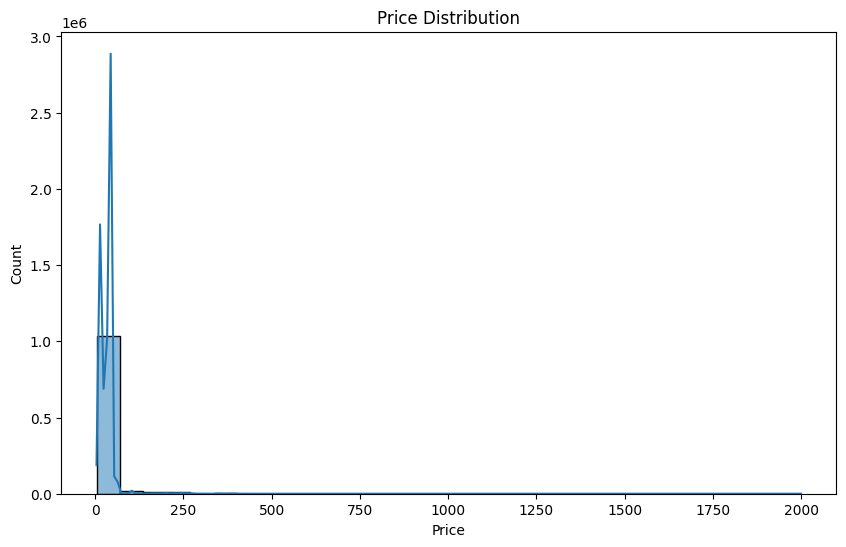

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

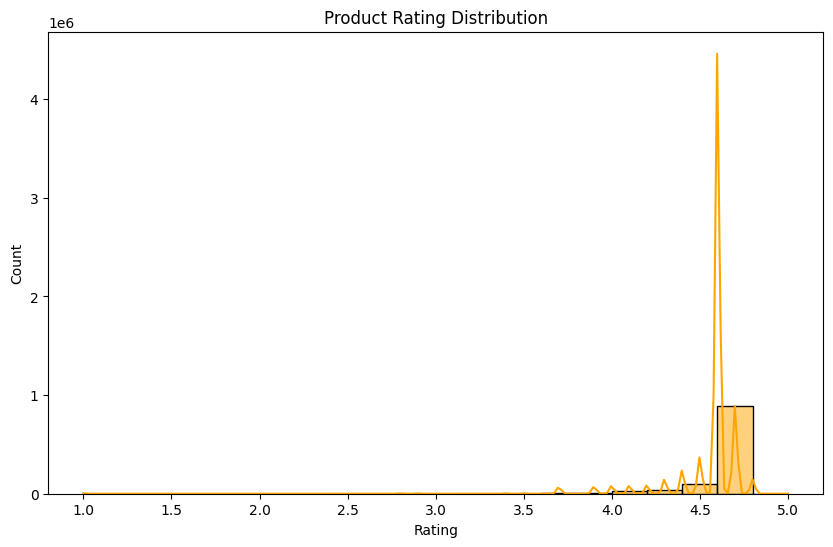

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Rating_clean'], bins=20, kde=True, color='orange')
plt.title('Product Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

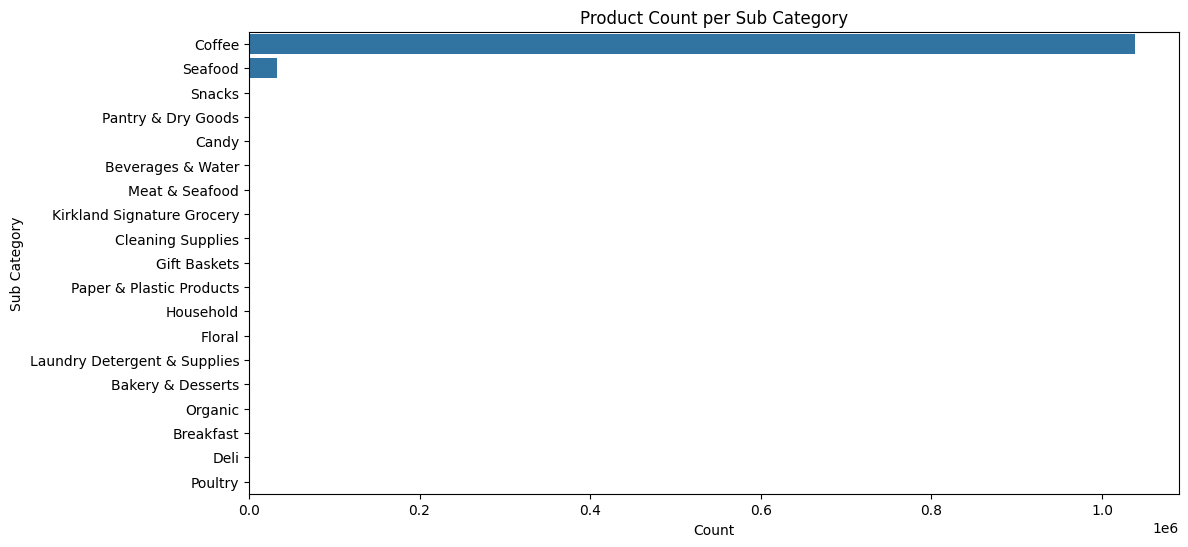

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, y='Sub Category', order=df_clean['Sub Category'].value_counts().index)
plt.title('Product Count per Sub Category')
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.show()

<ipython-input-31-59759e360cba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.values, y=avg_price.index, palette='viridis')


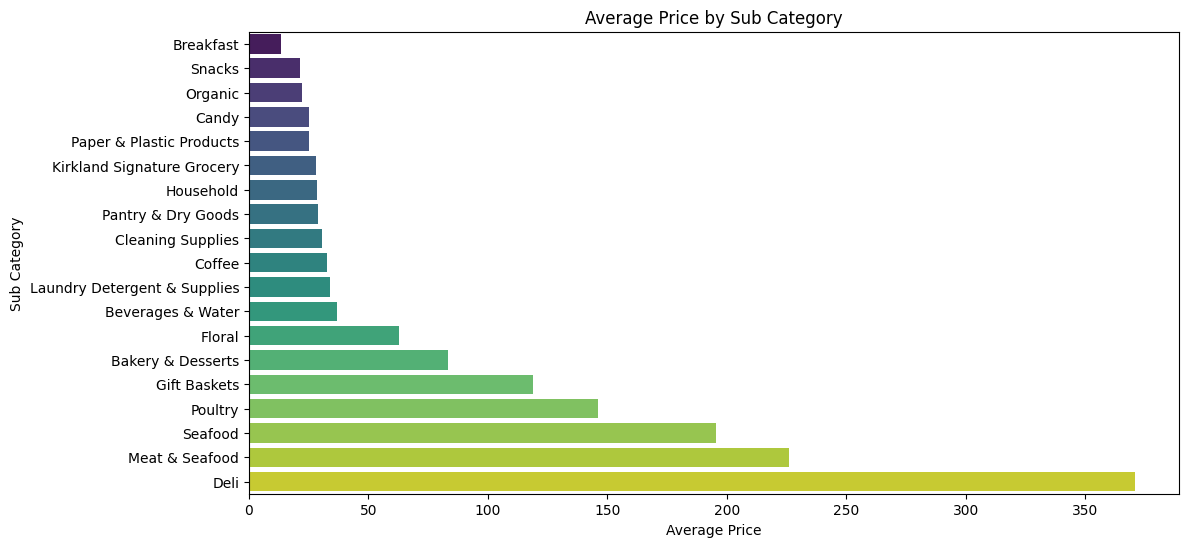

In [ ]:
plt.figure(figsize=(12, 6))
avg_price = df_clean.groupby('Sub Category')['Price'].mean().sort_values()
sns.barplot(x=avg_price.values, y=avg_price.index, palette='viridis')
plt.title('Average Price by Sub Category')
plt.xlabel('Average Price')
plt.ylabel('Sub Category')
plt.show()

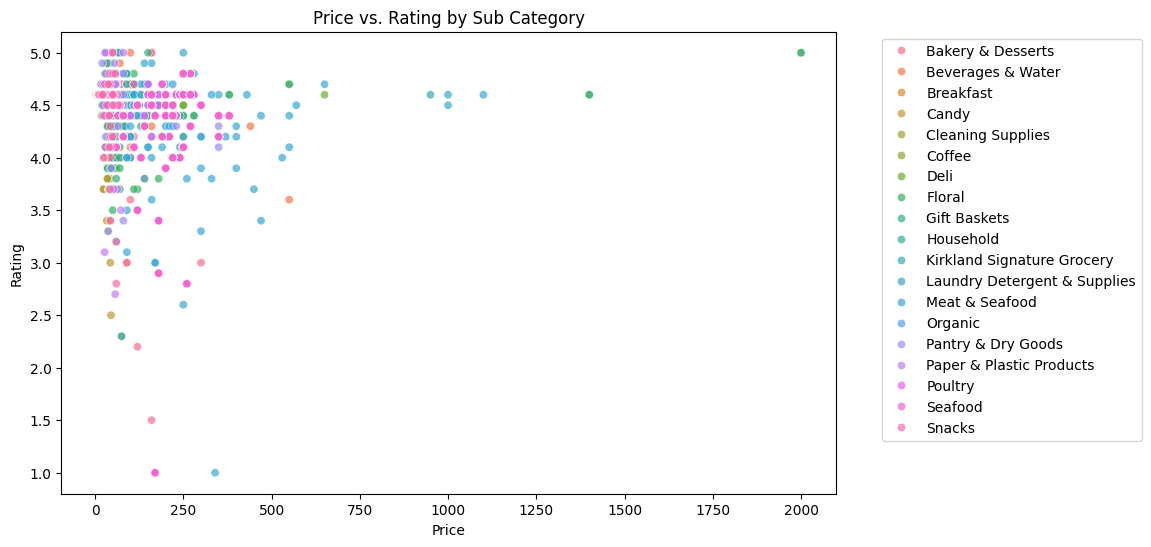

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Price', y='Rating_clean', hue='Sub Category', alpha=0.7)
plt.title('Price vs. Rating by Sub Category')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
top_rated = df_clean.sort_values(by='Rating_clean', ascending=False)[['Title', 'Sub Category', 'Rating_clean']].head(10)
print(top_rated)

                                                     Title  \
1039507  Artstyle Paper Plate & Napkin Bundle, Year of ...   
1039561  Eco Raj 12 oz Compostable Bagasse Bowl, 1000-c...   
1038712      Plaza Golden Osetra Caviar Kilo Pack, 35.2 oz   
118      Pulp & Press Organic Cold-Pressed Juice Variet...   
1039370                  eat.art Salt and Spice Set 2-pack   
1039376  Namaste Gluten Free Waffle & Pancake Mix 3 lb ...   
1039204  Sampler: Dry-Cured Acorn-Fed 100% Iberico Pork...   
1038863                         TRE Olive Merenda Gift Box   
56             Joyburst Energy Variety, 12 fl oz, 18-count   
1039266  Portoro Australian Primal Beef Striploin - 1 T...   

                     Sub Category  Rating_clean  
1039507  Paper & Plastic Products           5.0  
1039561  Paper & Plastic Products           5.0  
1038712                      Deli           5.0  
118             Beverages & Water           5.0  
1039370        Pantry & Dry Goods           5.0  
1039376        Pa

In [ ]:
most_expensive = df_clean.sort_values(by='Price', ascending=False)[['Title', 'Sub Category', 'Price']].head(10)
print(most_expensive)

                                                     Title  \
1038712      Plaza Golden Osetra Caviar Kilo Pack, 35.2 oz   
1038882      Plaza Golden Osetra Caviar Kilo Pack, 35.2 oz   
1038722                      Plaza Osetra Kilo Caviar Pack   
1038881                      Plaza Osetra Kilo Caviar Pack   
1039214  Japanese Wagyu Boneless Ribeye Roast, A5 Grade...   
1039219   Japanese Wagyu Tenderloin Roast, A5 Grade, 6 lbs   
1039213  Japanese Wagyu New York Strip Loin Roast, A5 G...   
1039025          Whole Wheel Parmigiano Reggiano, 72 lbs.    
1039275  Japanese Wagyu Filet Mignons Steaks, A5 Grade,...   
1038711  Covap Jamon Iberico Bellota Ham Leg with Stand...   

                       Sub Category    Price  
1038712                        Deli  1999.99  
1038882                Gift Baskets  1999.99  
1038722                        Deli  1399.99  
1038881                Gift Baskets  1399.99  
1039214              Meat & Seafood  1099.99  
1039219              Meat & Seafood

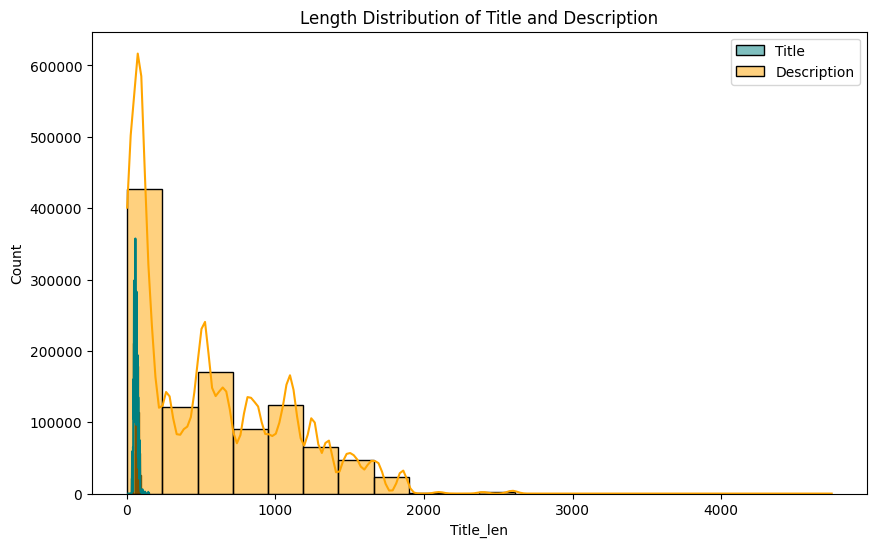

In [ ]:
df_clean['Title_len'] = df_clean['Title'].apply(lambda x: len(str(x)))
df_clean['Desc_len'] = df_clean['Product Description'].apply(lambda x: len(str(x)))

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Title_len'], color='teal', bins=20, kde=True, label='Title')
sns.histplot(df_clean['Desc_len'], color='orange', bins=20, kde=True, label='Description')
plt.title("Length Distribution of Title and Description")
plt.legend()
plt.show()

In [ ]:
# Let's use the current DataFrame (replace with your actual cleaned variable if needed)
df_clean = df_sales_all.copy()

# Columns we will use
# Instead of using 'Discount' we should use 'Discount_x' as it exists in df_sales_all
final_cols = [
    'Sub Category',
    'Price',
    'Discount_x',
    'Rating',
    'Title',
    'Product Description',
    'Sales'  # Target column
]

# First, keep only necessary columns
df_clean = df_clean[final_cols]

# Function to extract numbers
import re

def extract_float(text):
    try:
        return float(re.findall(r'\d+\.\d+|\d+', str(text))[0])
    except:
        return None

# Clean & convert
df_clean['Price'] = df_clean['Price'].apply(extract_float)
# Applying extract_float on 'Discount_x' and renaming it to 'Discount'
df_clean['Discount'] = df_clean['Discount_x'].apply(lambda x: 0 if 'No Discount' in str(x) else extract_float(x))
df_clean['Rating'] = df_clean['Rating'].apply(extract_float)

# Drop any rows that still have nulls in important columns
df_clean.dropna(subset=['Price', 'Discount', 'Rating', 'Sales'], inplace=True)

# Final check
print("Final shape:", df_clean.shape)
print(df_clean.head())

# Save the cleaned dataset
df_clean.to_csv("sales_prediction_dataset.csv", index=False)
print("✅ Dataset saved as 'sales_prediction_dataset.csv'")

Final shape: (0, 8)
Empty DataFrame
Columns: [Sub Category, Price, Discount_x, Rating, Title, Product Description, Sales, Discount]
Index: []
✅ Dataset saved as 'sales_prediction_dataset.csv'


``` Customer Segmentation```

In [ ]:
df_segmentation = pd.concat([df_6, df_7], ignore_index=True)


In [ ]:
# Drop rows with missing behavioral indicators
df_segmentation.dropna(subset=['Total', 'Quantity', 'Rating', 'gross income'], inplace=True)

# Convert columns
df_segmentation['Total'] = pd.to_numeric(df_segmentation['Total'], errors='coerce')
df_segmentation['Rating'] = pd.to_numeric(df_segmentation['Rating'], errors='coerce')

# Drop NaNs post conversion
df_segmentation.dropna(inplace=True)

# Remove duplicates
df_segmentation.drop_duplicates(inplace=True)

# Final overview
df_segmentation.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905e+00,15.379369,6.97270
std,26.488001,2.922699,11.705896,245.823825,234.117929,5.419243e-14,11.705896,1.71815
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.00000


In [ ]:
df_segmentation.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,source
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,df_6
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,df_6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,df_6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,df_6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,df_6


In [ ]:
# Check for nulls
print("Null values per column:")
print(df_segmentation.isna().sum())

# Drop rows with nulls (if any)
df_segmentation_cleaned = df_segmentation.dropna()

# Check shape after cleaning
print("Cleaned dataset shape:", df_segmentation_cleaned.shape)


Null values per column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
source                     0
dtype: int64
Cleaned dataset shape: (2000, 18)


In [ ]:
# Summary of numeric data
df_segmentation_cleaned.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905e+00,15.379369,6.97270
std,26.488001,2.922699,11.705896,245.823825,234.117929,5.419243e-14,11.705896,1.71815
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.00000


In [ ]:
# Categorical feature distributions
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'source']

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df_segmentation_cleaned[col].value_counts())


Value counts for Branch:
Branch
A    680
B    664
C    656
Name: count, dtype: int64

Value counts for City:
City
Yangon       680
Mandalay     664
Naypyitaw    656
Name: count, dtype: int64

Value counts for Customer type:
Customer type
Member    1002
Normal     998
Name: count, dtype: int64

Value counts for Gender:
Gender
Female    1002
Male       998
Name: count, dtype: int64

Value counts for Product line:
Product line
Fashion accessories       356
Food and beverages        348
Electronic accessories    340
Sports and travel         332
Home and lifestyle        320
Health and beauty         304
Name: count, dtype: int64

Value counts for Payment:
Payment
Ewallet        690
Cash           688
Credit card    622
Name: count, dtype: int64

Value counts for source:
source
df_6    1000
df_7    1000
Name: count, dtype: int64


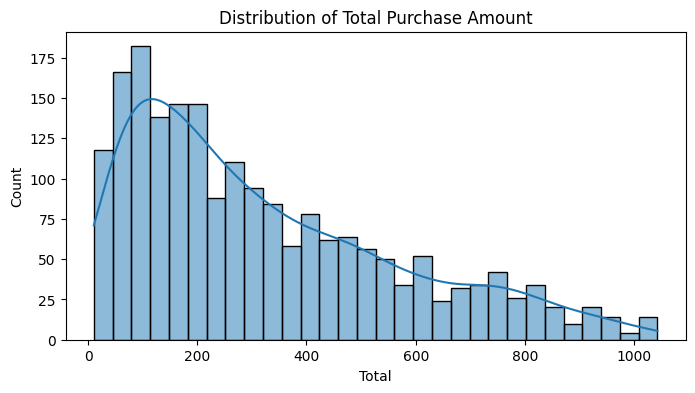

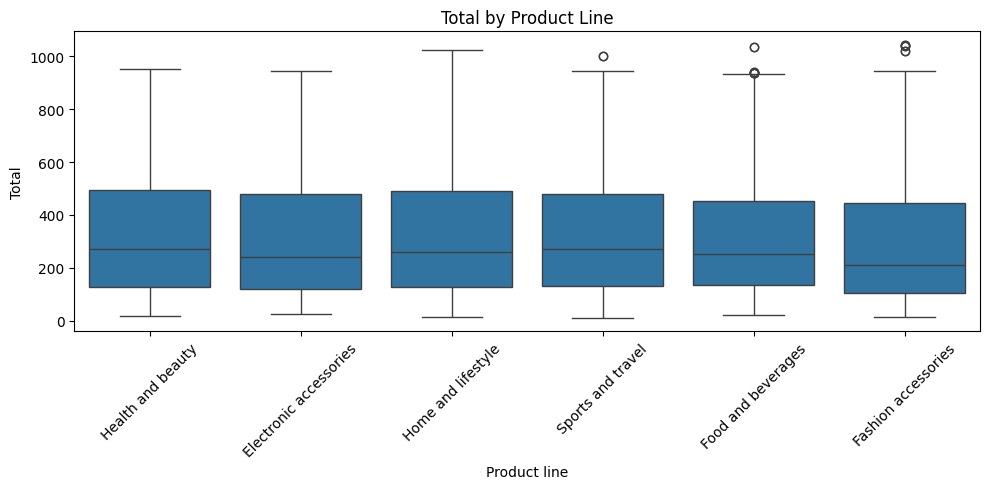

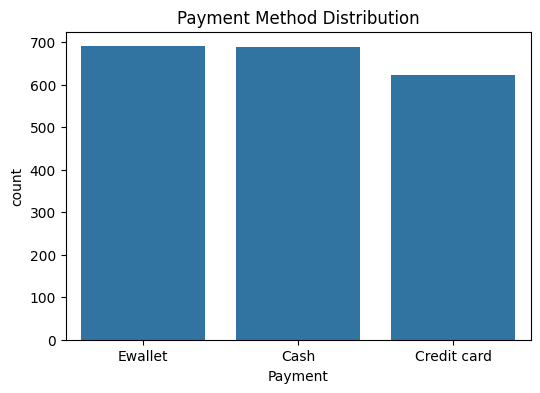

<ipython-input-55-e438d0220515>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_segmentation_cleaned, x='City', y='Rating', ci=None)


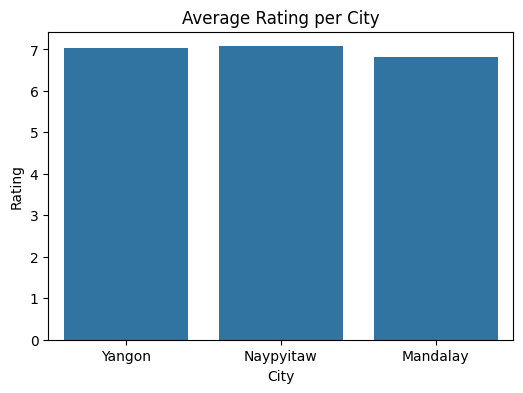

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Total
plt.figure(figsize=(8, 4))
sns.histplot(df_segmentation_cleaned['Total'], bins=30, kde=True)
plt.title('Distribution of Total Purchase Amount')
plt.show()

# Product line vs Total
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_segmentation_cleaned, x='Product line', y='Total')
plt.title('Total by Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Payment method distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_segmentation_cleaned, x='Payment')
plt.title('Payment Method Distribution')
plt.show()

# City vs Average Rating
plt.figure(figsize=(6, 4))
sns.barplot(data=df_segmentation_cleaned, x='City', y='Rating', ci=None)
plt.title('Average Rating per City')
plt.show()

In [ ]:
# Save the cleaned and EDA-ready dataset
df_segmentation_cleaned.to_csv('segmentation_cleaned.csv', index=False)
print("✅ Cleaned segmentation dataset saved as 'segmentation_cleaned.csv'")

✅ Cleaned segmentation dataset saved as 'segmentation_cleaned.csv'


```Market Basket Analysis```

In [ ]:
# Melt df_5 into transaction-item pairs
df_basket = pd.melt(df_5, id_vars=['Item(s)'], value_name='item')
df_basket = df_basket.dropna(subset=['item'])
df_basket.rename(columns={'Item(s)': 'TransactionID'}, inplace=True)

In [ ]:
# Lowercase all item names
df_basket['item'] = df_basket['item'].str.strip().str.lower()

# Drop duplicates
df_basket.drop_duplicates(inplace=True)

# Check for nulls
df_basket.dropna(subset=['TransactionID', 'item'], inplace=True)

# Final check
print(df_basket.value_counts().head())

TransactionID  variable  item            
32             source    df_5                1
1              Item 1    abrasive cleaner    1
                         artif. sweetener    1
                         baby cosmetics      1
                         bags                1
Name: count, dtype: int64


In [ ]:
df_basket_cleaned = df_basket.drop(columns=['variable'])
df_basket_cleaned = df_basket_cleaned.dropna()


In [ ]:
basket_matrix = df_basket_cleaned.groupby(['TransactionID', 'item']).size().unstack().fillna(0)
basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0)

<ipython-input-62-e90f868d5ba8>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
df_basket.head()

,TransactionID,variable,item
0,4,Item 1,citrus fruit
1,3,Item 1,tropical fruit
2,1,Item 1,whole milk
3,4,Item 1,pip fruit
4,4,Item 1,other vegetables


In [ ]:
# Save the df_basket dataset to a CSV file for later use in Market Basket Analysis
df_basket.to_csv("market_basket_dataset.csv", index=False)
"Dataset 'market_basket_dataset.csv' has been saved successfully."


"Dataset 'market_basket_dataset.csv' has been saved successfully."

```Product Popularity / Rating Prediction```

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
df_product_popularity = pd.read_csv('/content/GroceryDataset.csv')  # Replace with actual file name

# Step 3: Check the initial shape and preview
print("Initial shape:", df_product_popularity.shape)
print(df_product_popularity.columns)

# Step 4: Define the important columns to keep
important_cols = ['Sub Category', 'Price', 'Discount', 'Rating', 'Title']

# Step 5: Keep only the important columns
df_2 = df_product_popularity[important_cols]

# Step 6: Check the shape and preview the final DataFrame
print("Shape after keeping important columns:", df_2.shape)
df_2.head()


Initial shape: (1757, 8)
Index(['Sub Category', 'Price', 'Discount', 'Rating', 'Title', 'Currency',
       'Feature', 'Product Description'],
      dtype='object')
Shape after keeping important columns: (1757, 5)


,Sub Category,Price,Discount,Rating,Title
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ..."
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak..."
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ..."
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb..."


In [ ]:
import pandas as pd
import numpy as np
import re

# Step 1: Load dataset
df_2 = pd.read_csv('/content/GroceryDataset.csv')  # Replace with your actual filename
print("Initial shape:", df_2.shape)

# Step 2: Keep only important columns
important_cols = ['Sub Category', 'Price', 'Discount', 'Rating', 'Title']
df_2 = df_2[important_cols]
print("Shape after keeping important columns:", df_2.shape)

# Step 3: Clean 'Price' column – remove "$" and convert to float
df_2['Price'] = df_2['Price'].replace('[\$,]', '', regex=True).astype(float)

# Step 4: Extract numeric rating score from 'Rating' column
df_2['Rating_Score'] = df_2['Rating'].str.extract(r'Rated ([0-9.]+)')[0].astype(float)

# Step 5: Extract number of reviews (optional but useful feature)
df_2['Num_Reviews'] = df_2['Rating'].str.extract(r'based on ([\d,]+)')[0]
df_2['Num_Reviews'] = df_2['Num_Reviews'].str.replace(',', '').astype(float)

# Step 6: Convert 'Discount' to binary (1 = has discount, 0 = no discount)
df_2['Has_Discount'] = df_2['Discount'].apply(lambda x: 0 if 'No Discount' in str(x) else 1)

# Step 7: Label popularity (target variable)
# Rule: Popular if Rating >= 4.5 and Num_Reviews >= 500
df_2['Popular'] = np.where((df_2['Rating_Score'] >= 4.5) & (df_2['Num_Reviews'] >= 500), 1, 0)

# Step 8: Final dataset for model
df_final = df_2[['Sub Category', 'Price', 'Has_Discount', 'Rating_Score', 'Num_Reviews', 'Popular']]

# Step 9: Save final cleaned dataset for modeling
df_final.to_csv("product_popularity_model_ready.csv", index=False)
print("Cleaned dataset saved as 'product_popularity_model_ready.csv'")
print("Final shape:", df_final.shape)


Initial shape: (1757, 8)
Shape after keeping important columns: (1757, 5)


ValueError: could not convert string to float: '32.99through-83.99'

In [ ]:
import pandas as pd
import numpy as np
import re

# Step 1: Load dataset
df_2 = pd.read_csv('/content/GroceryDataset.csv')  # Replace with your actual filename
print("Initial shape:", df_2.shape)

# Step 2: Keep only important columns
important_cols = ['Sub Category', 'Price', 'Discount', 'Rating', 'Title']
df_2 = df_2[important_cols]
print("Shape after keeping important columns:", df_2.shape)

# Step 3: Clean 'Price' column – remove "$" and convert to float
# ----> Updated to handle price ranges
def clean_price(price_str):
    """Extracts the first numeric price from a string, handling ranges."""
    try:
        # Match the first number (possibly with decimals)
        match = re.search(r'(\d+\.?\d*)', price_str)
        if match:
            return float(match.group(1))
        else:
            return np.nan  # Or handle as you prefer for non-numeric prices
    except (TypeError, ValueError):
        return np.nan

df_2['Price'] = df_2['Price'].apply(clean_price)

# Step 4: Extract numeric rating score from 'Rating' column
df_2['Rating_Score'] = df_2['Rating'].str.extract(r'Rated ([0-9.]+)')[0].astype(float)

# Step 5: Extract number of reviews (optional but useful feature)
df_2['Num_Reviews'] = df_2['Rating'].str.extract(r'based on ([\d,]+)')[0]
df_2['Num_Reviews'] = df_2['Num_Reviews'].str.replace(',', '').astype(float)

# Step 6: Convert 'Discount' to binary (1 = has discount, 0 = no discount)
df_2['Has_Discount'] = df_2['Discount'].apply(lambda x: 0 if 'No Discount' in str(x) else 1)

# Step 7: Label popularity (target variable)
# Rule: Popular if Rating >= 4.5 and Num_Reviews >= 500
df_2['Popular'] = np.where((df_2['Rating_Score'] >= 4.5) & (df_2['Num_Reviews'] >= 500), 1, 0)

# Step 8: Final dataset for model
df_final = df_2[['Sub Category', 'Price', 'Has_Discount', 'Rating_Score', 'Num_Reviews', 'Popular']]

# Step 9: Save final cleaned dataset for modeling
df_final.to_csv("product_popularity_model_ready.csv", index=False)
print("Cleaned dataset saved as 'product_popularity_model_ready.csv'")
print("Final shape:", df_final.shape)

Initial shape: (1757, 8)
Shape after keeping important columns: (1757, 5)
Cleaned dataset saved as 'product_popularity_model_ready.csv'
Final shape: (1757, 6)


In [ ]:
df_final.head()

,Sub Category,Price,Has_Discount,Rating_Score,Num_Reviews,Popular
0,Bakery & Desserts,56.99,0,4.3,265.0,0
1,Bakery & Desserts,159.99,0,5.0,1.0,0
2,Bakery & Desserts,44.99,0,4.1,441.0,0
3,Bakery & Desserts,39.99,0,4.7,9459.0,1
4,Bakery & Desserts,59.99,0,4.5,758.0,1


In [ ]:
POPULARITY_CLEAN = 'market_basket_dataset.csv'

In [ ]:
df = pd.read_csv(POPULARITY_CLEAN)

In [ ]:
df.head()

,TransactionID,variable,item
0,4,Item 1,citrus fruit
1,3,Item 1,tropical fruit
2,1,Item 1,whole milk
3,4,Item 1,pip fruit
4,4,Item 1,other vegetables


In [ ]:
# Step 1: Install necessary packages
!pip install mlxtend

# Step 2: Import Libraries
import pandas as pd
import pickle
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 4: Load the dataset
df = pd.read_csv("market_basket_dataset.csv")
df.head()


,TransactionID,variable,item
0,4,Item 1,citrus fruit
1,3,Item 1,tropical fruit
2,1,Item 1,whole milk
3,4,Item 1,pip fruit
4,4,Item 1,other vegetables


In [ ]:
# Step 5: Preprocess the dataset into transaction format

# Group by TransactionID and aggregate items into a list
transactions = df.groupby("TransactionID")["item"].apply(list).tolist()

# Encode transactions into a format suitable for mlxtend
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

df_encoded.head()


,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,True,True,True,False,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
1,True,True,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,False,False,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
4,True,True,False,False,False,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True


In [ ]:
# Step 7: Save the model (rules) as a pickle file
model = {
    "frequent_itemsets": frequent_itemsets,
    "rules": rules
}

with open("basket_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Optional: Download the model
files.download("basket_model.pkl")
